# Быстрое преобразование Фурье

In [2]:
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

Простая рекурсивная реализация прямого и обратного преобразования Фурье:

In [3]:
def fft_recursive(values, inverse):
    n = len(values)
    if n == 1:
        return values
    even = fft_recursive(values[::2], inverse)
    odd = fft_recursive(values[1::2], inverse)
    exponent = np.exp((-1 if inverse else 1) * -2j *
                      np.pi / n * np.arange(n / 2))
    # butterfly
    return np.concatenate([even + exponent * odd, even - exponent * odd])


def fft(values, inverse=False):
    n = len(values)
    copy = np.append(values, np.zeros(2 ** int(math.ceil(np.log2(n))) - n))
    return (fft_recursive(copy, inverse) / (n if inverse else 1))[:n]


def ifft(values):
     return fft(values, True)

Обертка для сравнения исходной и искаженной функций. Переменная cut - доля обнуленных последних коэффициентов в преобразовании.

In [4]:
def draw(func, values=np.linspace(1, 10, 128), cut=0, title="") :
    result = func(values)
    transformed = fft(result)
    if cut > 0:
        cut_num = int(len(values) * cut)
        title += "(cut = {} of {})".format(cut_num, len(values))
        transformed[-cut_num:] = 0
    distorted = ifft(transformed)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(values, result, label="source")
    plt.plot(values, distorted, label="distorted")
    plt.legend()
    plt.title(title)
    plt.show()

## Эксперименты

Примеры функций:

In [5]:
def linear(x):
    return x

def square(x):
    return x**2

def sin_of_square(x):
    return np.sin(x ** 2)

def sin_divide_by_x(x):
    return np.sin(x) / x

Как и предполагалось, разница между исходной функцией и функцией, полученной обратным преобразованием, не видна:

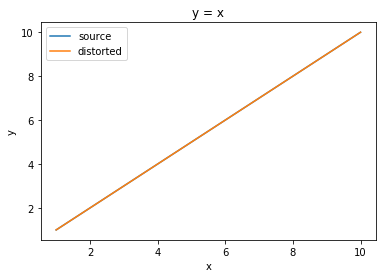

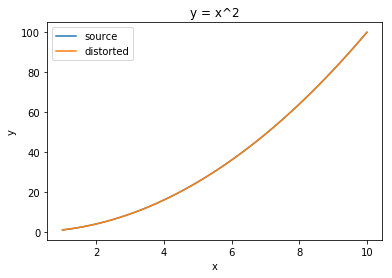

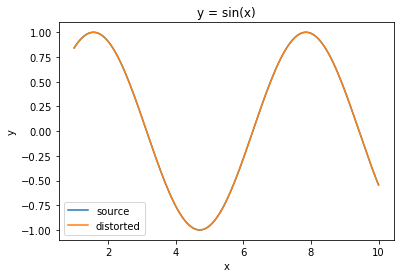

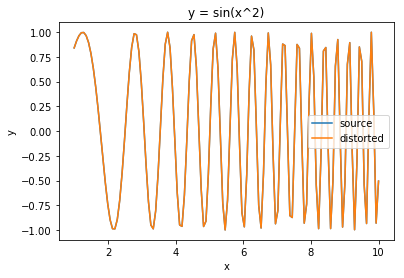

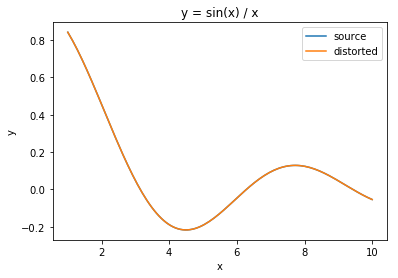

In [11]:
draw(linear, title="y = x")
draw(square, title="y = x^2")
draw(np.sin, title="y = sin(x)")
draw(sin_of_square, title="y = sin(x^2)")
draw(sin_divide_by_x, title="y = sin(x) / x")

Удалим 1% коэффициентов:

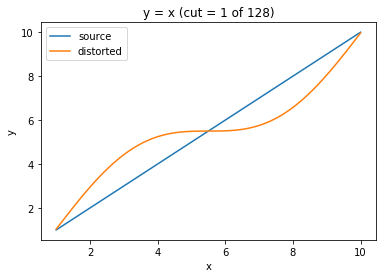

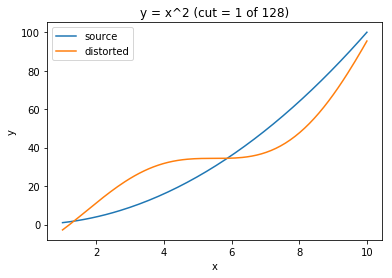

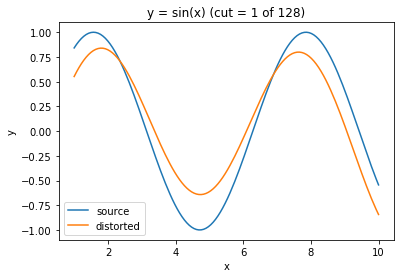

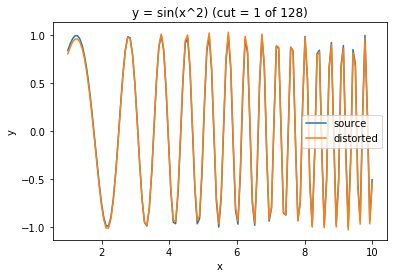

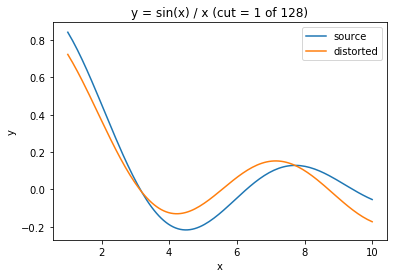

In [7]:
cut = 0.01
draw(linear, cut=cut, title="y = x ")
draw(square, cut=cut, title="y = x^2 ")
draw(np.sin, cut=cut, title="y = sin(x) ")
draw(sin_of_square, cut=cut, title="y = sin(x^2) ")
draw(sin_divide_by_x, cut=cut, title="y = sin(x) / x ")

Как видим, полиномы сильно искажаются даже при удалении всего одного коэффициента. Тригонометрические функции изменились слабее.
Теперь удалим 5%:

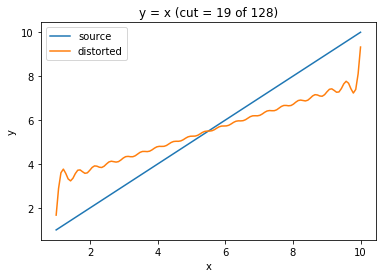

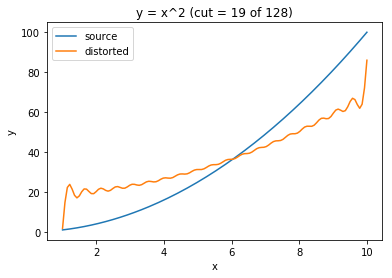

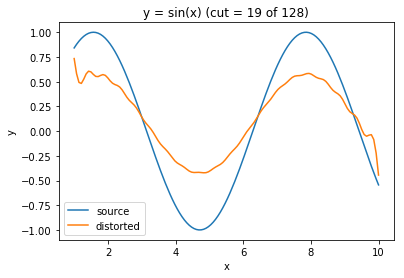

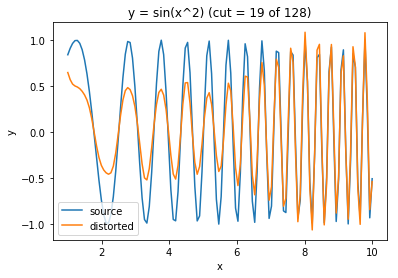

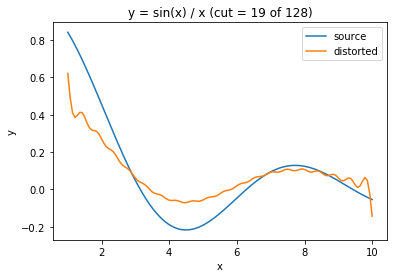

In [8]:
cut = 0.15
draw(linear, cut=cut, title="y = x ")
draw(square, cut=cut, title="y = x^2 ")
draw(np.sin, cut=cut, title="y = sin(x) ")
draw(sin_of_square, cut=cut, title="y = sin(x^2) ")
draw(sin_divide_by_x, cut=cut, title="y = sin(x) / x ")

Все функции, кроме $\sin(x)$ и $\sin(x^2)$, довольно сильно исказились (что, впрочем, легко объясняется физическим смыслом преобразования).

Еще немного экспериментов.

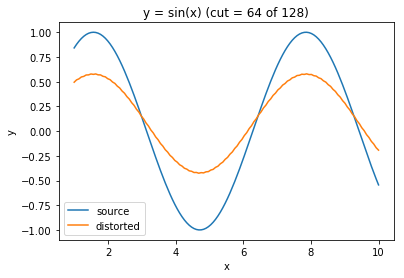

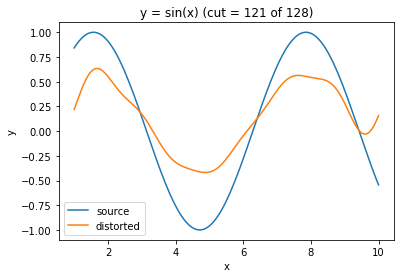

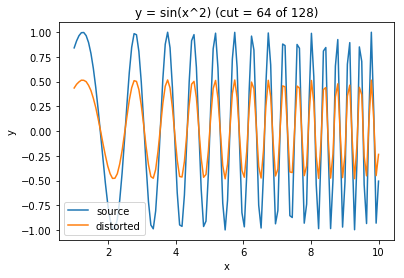

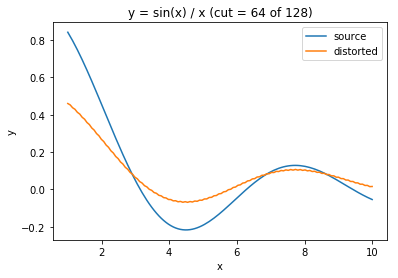

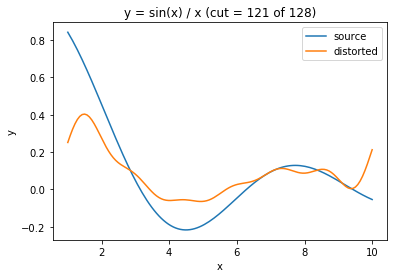

In [9]:
draw(np.sin, cut=0.5, title="y = sin(x) ")
draw(np.sin, cut=0.95, title="y = sin(x) ")
draw(sin_of_square, cut=0.5, title="y = sin(x^2) ")
draw(sin_divide_by_x, cut=0.5, title="y = sin(x) / x ")
draw(sin_divide_by_x, cut=0.95, title="y = sin(x) / x ")

Тригонометрические функции сохраняют форму даже при большой доле удаленных коэффициентов, а $\frac{\sin(x)}x$ спрямляется.

## Умножение многочленов

In [10]:
x = np.array([2,5,0,0])
y = np.array([3,2,1,0])

xt = fft(x)
yt = fft(y)
xyt = xt * yt
product = (ifft(xyt).real)
print product

[  6.  19.  12.   5.]
